In [1]:
# 첫 번째 셀에서 실행
import sys
!pip install opencv-python ultralytics numpy matplotlib torch torchvision

# 설치 확인
import cv2
import torch
print("✅ 모든 라이브러리 설치 완료!")
print(f"OpenCV: {cv2.__version__}")
print(f"PyTorch: {torch.__version__}")

  Using cached ultralytics-8.3.156-py3-none-any.whl.metadata (37 kB)
  Using cached matplotlib-3.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pandas-2.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
Using cached ultralytics-8.3.156-py3-none-any.whl (1.0 MB)
Using cached matplotlib-3.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached pandas-2.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
✅ 모든 라이브러리 설치 완료!
OpenCV: 4.11.0
PyTorch: 2.1.0+cu118


WARNING ⚠️ user config directory '/root/.config/Ultralytics' is not writeable, defaulting to '/tmp' or CWD.Alternatively you can define a YOLO_CONFIG_DIR environment variable for this path.
🚗 ADAS 시스템 초기화 중...
ADAS 시스템 초기화 중... (백엔드: pytorch)
YOLO 모델 다운로드 중...


100%|██████████| 6.25M/6.25M [00:00<00:00, 84.4MB/s]


✅ PyTorch YOLO 모델 로드 완료
🔍 이미지 처리 중...


/tmp/ipykernel_12845/620794663.py:140: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/620794663.py:140: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/620794663.py:140: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/620794663.py:140: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/620794663.py:140: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/620794663.py:140: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/620794663.py:140: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight

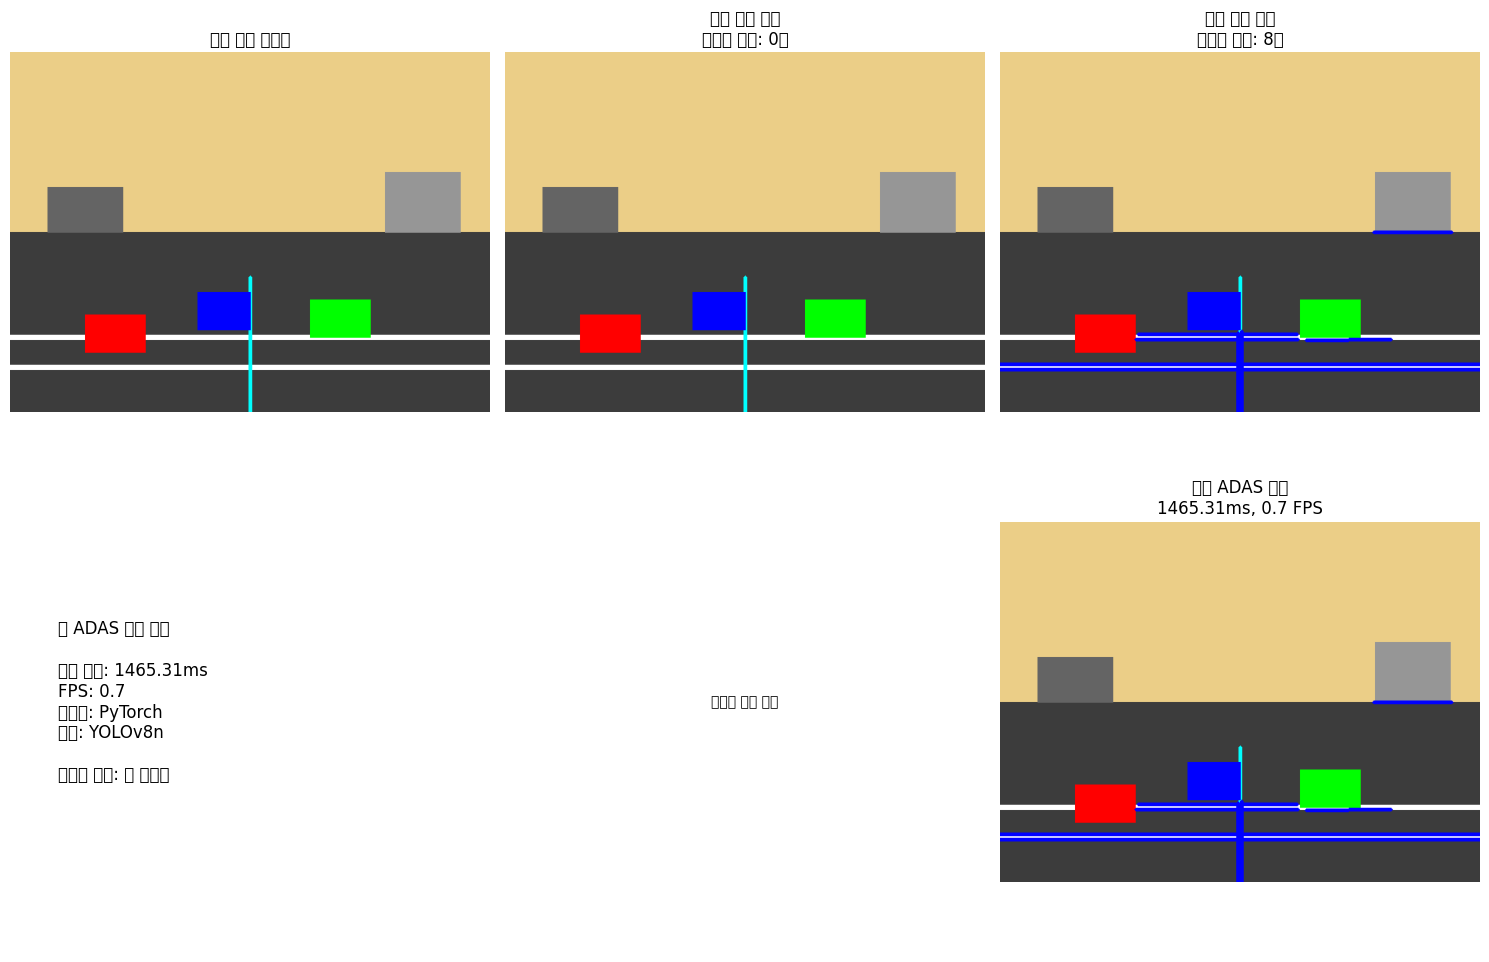


✅ 처리 완료!
📊 성능: 1465.31ms, 0.7 FPS


In [2]:
import sys
sys.path.append('/workspace/adas_project/src')
from adas_system import ADASSystem
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 테스트 이미지 생성 (더 현실적인 도로 장면)
def create_realistic_road():
    img = np.zeros((480, 640, 3), dtype=np.uint8)
    
    # 배경 (하늘과 도로)
    img[:240, :] = [135, 206, 235]  # 하늘색
    img[240:, :] = [60, 60, 60]     # 도로색
    
    # 차선 (흰색)
    cv2.line(img, (0, 380), (640, 380), (255, 255, 255), 5)
    cv2.line(img, (0, 420), (640, 420), (255, 255, 255), 5)
    cv2.line(img, (320, 300), (320, 480), (255, 255, 0), 3)  # 중앙선
    
    # 차량들 (다양한 색상)
    cv2.rectangle(img, (100, 350), (180, 400), (0, 0, 255), -1)     # 빨간 차량
    cv2.rectangle(img, (400, 330), (480, 380), (0, 255, 0), -1)     # 초록 차량
    cv2.rectangle(img, (250, 320), (320, 370), (255, 0, 0), -1)     # 파란 차량
    
    # 건물들 (배경)
    cv2.rectangle(img, (50, 180), (150, 240), (100, 100, 100), -1)
    cv2.rectangle(img, (500, 160), (600, 240), (150, 150, 150), -1)
    
    return img

# 2. ADAS 시스템으로 처리
print("🚗 ADAS 시스템 초기화 중...")
adas = ADASSystem()

# 테스트 이미지 생성
original_img = create_realistic_road()

# ADAS 처리
print("🔍 이미지 처리 중...")
result = adas.process_frame(original_img.copy())

# 3. 결과 시각화
plt.figure(figsize=(15, 10))

# 원본 이미지
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('원본 도로 이미지')
plt.axis('off')

# 객체 검출 결과 시각화
detected_img = original_img.copy()
if result['objects'] and len(result['objects']) > 0:
    for detection in result['objects']:
        boxes = detection.boxes
        if boxes is not None:
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                conf = box.conf[0].cpu().numpy()
                cls = int(box.cls[0].cpu().numpy())
                
                if conf > 0.3:  # 신뢰도 30% 이상
                    cv2.rectangle(detected_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)
                    cv2.putText(detected_img, f'{adas.object_detector.names[cls]}: {conf:.2f}', 
                              (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB))
plt.title(f'객체 검출 결과\n검출된 객체: {len([box for detection in result["objects"] for box in detection.boxes if box.conf[0] > 0.3]) if result["objects"] else 0}개')
plt.axis('off')

# 차선 검출 결과
lane_img = original_img.copy()
if result['lanes'] is not None:
    for line in result['lanes']:
        x1, y1, x2, y2 = line[0]
        cv2.line(lane_img, (x1, y1), (x2, y2), (255, 0, 0), 4)

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(lane_img, cv2.COLOR_BGR2RGB))
plt.title(f'차선 검출 결과\n검출된 차선: {len(result["lanes"]) if result["lanes"] is not None else 0}개')
plt.axis('off')

# 성능 정보
plt.subplot(2, 3, 4)
performance_text = f"""
🎯 ADAS 성능 정보

처리 시간: {result['processing_time_ms']:.2f}ms
FPS: {result['fps']:.1f}
백엔드: PyTorch
모델: YOLOv8n

실시간 처리: {'✅ 가능' if result['fps'] > 25 else '❌ 어려움'}
"""
plt.text(0.1, 0.5, performance_text, fontsize=12, verticalalignment='center')
plt.axis('off')

# 검출 상세 정보
plt.subplot(2, 3, 5)
if result['objects'] and len(result['objects']) > 0:
    detected_classes = {}
    for detection in result['objects']:
        boxes = detection.boxes
        if boxes is not None:
            for box in boxes:
                conf = box.conf[0].cpu().numpy()
                cls = int(box.cls[0].cpu().numpy())
                if conf > 0.3:
                    class_name = adas.object_detector.names[cls]
                    detected_classes[class_name] = detected_classes.get(class_name, 0) + 1
    
    if detected_classes:
        classes = list(detected_classes.keys())
        counts = list(detected_classes.values())
        plt.bar(classes, counts, color=['red', 'green', 'blue', 'orange'][:len(classes)])
        plt.title('검출된 객체 분포')
        plt.ylabel('개수')
        plt.xticks(rotation=45)
    else:
        plt.text(0.5, 0.5, '검출된 객체 없음', ha='center', va='center')
        plt.axis('off')
else:
    plt.text(0.5, 0.5, '검출된 객체 없음', ha='center', va='center')
    plt.axis('off')

# 전체 결과 (객체 + 차선)
combined_img = detected_img.copy()
if result['lanes'] is not None:
    for line in result['lanes']:
        x1, y1, x2, y2 = line[0]
        cv2.line(combined_img, (x1, y1), (x2, y2), (255, 0, 0), 4)

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
plt.title(f'전체 ADAS 결과\n{result["processing_time_ms"]:.2f}ms, {result["fps"]:.1f} FPS')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\n✅ 처리 완료!")
print(f"📊 성능: {result['processing_time_ms']:.2f}ms, {result['fps']:.1f} FPS")

In [3]:
import sys
sys.path.append('/workspace/adas_project/src')
from adas_system import ADASSystem
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ADAS 시스템 초기화
print("🚗 ADAS 시스템 초기화 중...")
adas = ADASSystem()

# 워밍업
print("🔥 워밍업 중...")
dummy_img = np.random.randint(0, 255, (480, 640, 3), dtype=np.uint8)
for _ in range(3):
    _ = adas.process_frame(dummy_img)

# 두 이미지 테스트
image_paths = [
    '/workspace/adas_project/1.jpg',  # 복잡한 도시 교통
    '/workspace/adas_project/2.jpg'   # 단순한 도로
]

image_names = ['복잡한 도시 교통', '단순한 도로']

results = []

for i, (img_path, img_name) in enumerate(zip(image_paths, image_names)):
    print(f"\n📸 {img_name} 처리 중...")
    
    # 이미지 로드
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ {img_path} 이미지를 찾을 수 없습니다.")
        continue
    
    print(f"✅ 이미지 로드 성공! 크기: {img.shape}")
    
    # ADAS 처리
    result = adas.process_frame(img)
    results.append((img, result, img_name))
    
    print(f"🎯 성능: {result['processing_time_ms']:.2f}ms, {result['fps']:.1f} FPS")

# 결과 시각화
if results:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    for idx, (img, result, name) in enumerate(results):
        # 원본 이미지
        axes[idx, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[idx, 0].set_title(f'{name}\n원본 이미지')
        axes[idx, 0].axis('off')
        
        # 객체 검출 결과
        detected_img = img.copy()
        detected_count = 0
        
        if result['objects'] and len(result['objects']) > 0:
            for detection in result['objects']:
                boxes = detection.boxes
                if boxes is not None:
                    for box in boxes:
                        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                        conf = box.conf[0].cpu().numpy()
                        cls = int(box.cls[0].cpu().numpy())
                        
                        if conf > 0.4:  # 신뢰도 40% 이상
                            detected_count += 1
                            cv2.rectangle(detected_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)
                            cv2.putText(detected_img, f'{adas.object_detector.names[cls]}: {conf:.2f}', 
                                      (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        
        axes[idx, 1].imshow(cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB))
        axes[idx, 1].set_title(f'객체 검출\n{detected_count}개 검출')
        axes[idx, 1].axis('off')
        
        # 차선 검출 결과
        lane_img = img.copy()
        lane_count = 0
        if result['lanes'] is not None:
            lane_count = len(result['lanes'])
            for line in result['lanes']:
                x1, y1, x2, y2 = line[0]
                cv2.line(lane_img, (x1, y1), (x2, y2), (255, 0, 0), 4)
        
        axes[idx, 2].imshow(cv2.cvtColor(lane_img, cv2.COLOR_BGR2RGB))
        axes[idx, 2].set_title(f'차선 검출\n{lane_count}개 검출\n{result["processing_time_ms"]:.2f}ms, {result["fps"]:.1f} FPS')
        axes[idx, 2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 성능 비교
    print("\n" + "="*60)
    print("🏁 두 이미지 성능 비교")
    print("="*60)
    for i, (img, result, name) in enumerate(results):
        detected_objects = 0
        if result['objects'] and len(result['objects']) > 0:
            for detection in result['objects']:
                if detection.boxes is not None:
                    detected_objects += len([box for box in detection.boxes if box.conf[0] > 0.4])
        
        lane_count = len(result['lanes']) if result['lanes'] is not None else 0
        
        print(f"{name}:")
        print(f"  처리 시간: {result['processing_time_ms']:6.2f}ms")
        print(f"  FPS:      {result['fps']:6.1f}")
        print(f"  검출 객체: {detected_objects:3d}개")
        print(f"  검출 차선: {lane_count:3d}개")
        print("-" * 40)
else:
    print("❌ 처리할 이미지가 없습니다.")

🚗 ADAS 시스템 초기화 중...
ADAS 시스템 초기화 중... (백엔드: pytorch)
YOLO 모델 다운로드 중...
✅ PyTorch YOLO 모델 로드 완료
🔥 워밍업 중...

📸 복잡한 도시 교통 처리 중...
❌ /workspace/adas_project/1.jpg 이미지를 찾을 수 없습니다.

📸 단순한 도로 처리 중...
❌ /workspace/adas_project/2.jpg 이미지를 찾을 수 없습니다.
❌ 처리할 이미지가 없습니다.


[ WARN:0@904.430] global loadsave.cpp:268 findDecoder imread_('/workspace/adas_project/1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@904.430] global loadsave.cpp:268 findDecoder imread_('/workspace/adas_project/2.jpg'): can't open/read file: check file path/integrity


In [4]:
import os
print("현재 디렉토리의 파일들:")
print(os.listdir('/workspace/'))

print("\nadas_project 디렉토리의 파일들:")  
print(os.listdir('/workspace/adas_project/'))

현재 디렉토리의 파일들:
['2.jpg.jpg', '3.jpg', '1.jpg', 'adas_project']

adas_project 디렉토리의 파일들:
['yolov8n.pt', 'configs', 'results', 'videos', 'src', 'data', 'models']


📂 파일 확인 중...
✅ 복잡한 도시 교통: /workspace/1.jpg
✅ 단순한 도로: /workspace/2.jpg
✅ 세 번째 이미지: /workspace/3.jpg

🚗 ADAS 시스템 초기화 중...
ADAS 시스템 초기화 중... (백엔드: pytorch)
YOLO 모델 다운로드 중...
✅ PyTorch YOLO 모델 로드 완료
🔥 워밍업 중...

📸 복잡한 도시 교통 처리 중...
✅ 로드 성공! 크기: (309, 550, 3)
🎯 성능: 236.68ms, 4.2 FPS

📸 단순한 도로 처리 중...
✅ 로드 성공! 크기: (4045, 2890, 3)
🎯 성능: 414.42ms, 2.4 FPS

📸 세 번째 이미지 처리 중...
✅ 로드 성공! 크기: (337, 600, 3)
🎯 성능: 14.74ms, 67.8 FPS


/tmp/ipykernel_12845/879647686.py:105: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/879647686.py:105: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/879647686.py:105: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/879647686.py:105: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/879647686.py:105: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/879647686.py:105: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/879647686.py:105: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from font(s) DejaVu Sans.
  plt.t

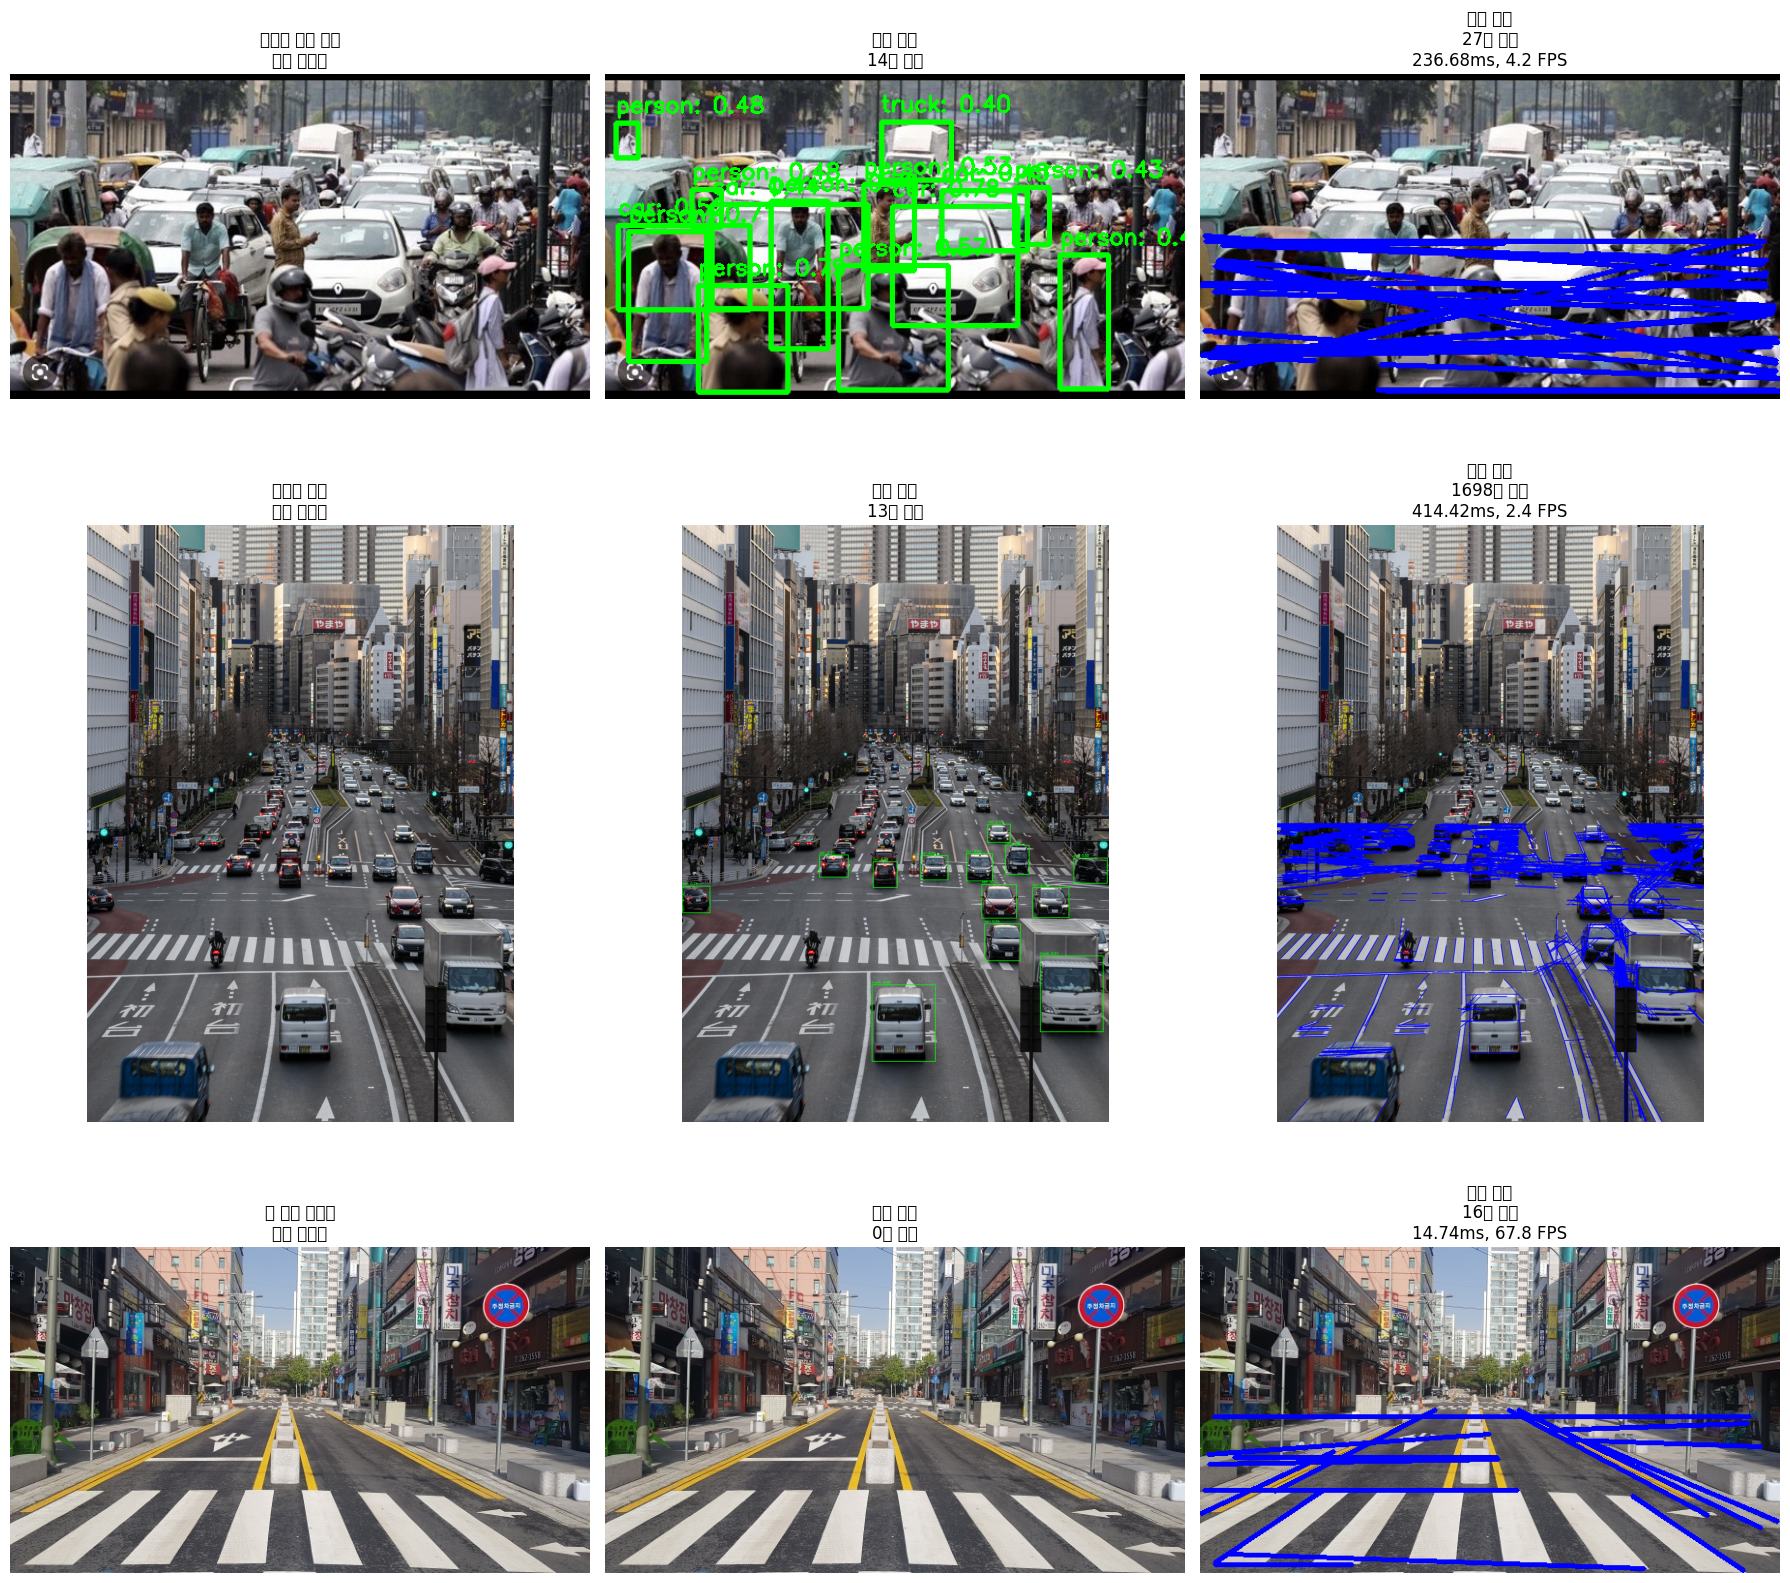


🏁 3개 이미지 성능 비교
1. 복잡한 도시 교통:
   처리 시간: 236.68ms
   FPS:         4.2
   총 객체:    14개
   차선:      27개
   객체 상세:
     - person: 9개
     - car: 4개
     - truck: 1개
----------------------------------------
2. 단순한 도로:
   처리 시간: 414.42ms
   FPS:         2.4
   총 객체:    13개
   차선:     1698개
   객체 상세:
     - car: 11개
     - truck: 2개
----------------------------------------
3. 세 번째 이미지:
   처리 시간:  14.74ms
   FPS:        67.8
   총 객체:     0개
   차선:      16개
----------------------------------------

🏆 최고 성능: 세 번째 이미지 (14.74ms)
🎯 최다 검출: 복잡한 도시 교통 (객체 다수 검출)


In [5]:
import sys
sys.path.append('/workspace/adas_project/src')
from adas_system import ADASSystem
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# 수정된 파일 경로들
image_paths = [
    '/workspace/1.jpg',      # 복잡한 도시 교통
    '/workspace/2.jpg',      # 단순한 도로 (수정됨)
    '/workspace/3.jpg'       # 세 번째 이미지
]

image_names = ['복잡한 도시 교통', '단순한 도로', '세 번째 이미지']

# 파일 존재 확인
print("📂 파일 확인 중...")
for path, name in zip(image_paths, image_names):
    if os.path.exists(path):
        print(f"✅ {name}: {path}")
    else:
        print(f"❌ {name}: {path} - 파일 없음")

print("\n🚗 ADAS 시스템 초기화 중...")
adas = ADASSystem()

# 워밍업
print("🔥 워밍업 중...")
dummy_img = np.random.randint(0, 255, (480, 640, 3), dtype=np.uint8)
for _ in range(3):
    _ = adas.process_frame(dummy_img)

results = []

for img_path, img_name in zip(image_paths, image_names):
    print(f"\n📸 {img_name} 처리 중...")
    
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ {img_path} 로드 실패")
        continue
    
    print(f"✅ 로드 성공! 크기: {img.shape}")
    
    # ADAS 처리
    result = adas.process_frame(img)
    results.append((img, result, img_name))
    
    print(f"🎯 성능: {result['processing_time_ms']:.2f}ms, {result['fps']:.1f} FPS")

# 결과 시각화
if results:
    num_images = len(results)
    fig, axes = plt.subplots(num_images, 3, figsize=(18, 6*num_images))
    
    if num_images == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (img, result, name) in enumerate(results):
        # 원본 이미지
        axes[idx, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[idx, 0].set_title(f'{name}\n원본 이미지')
        axes[idx, 0].axis('off')
        
        # 객체 검출 결과
        detected_img = img.copy()
        detected_count = 0
        
        if result['objects'] and len(result['objects']) > 0:
            for detection in result['objects']:
                boxes = detection.boxes
                if boxes is not None:
                    for box in boxes:
                        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                        conf = box.conf[0].cpu().numpy()
                        cls = int(box.cls[0].cpu().numpy())
                        
                        if conf > 0.4:  # 신뢰도 40% 이상
                            detected_count += 1
                            class_name = adas.object_detector.names[cls]
                            
                            cv2.rectangle(detected_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)
                            cv2.putText(detected_img, f'{class_name}: {conf:.2f}', 
                                      (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        
        axes[idx, 1].imshow(cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB))
        axes[idx, 1].set_title(f'객체 검출\n{detected_count}개 검출')
        axes[idx, 1].axis('off')
        
        # 차선 검출 결과
        lane_img = img.copy()
        lane_count = 0
        if result['lanes'] is not None:
            lane_count = len(result['lanes'])
            for line in result['lanes']:
                x1, y1, x2, y2 = line[0]
                cv2.line(lane_img, (x1, y1), (x2, y2), (255, 0, 0), 4)
        
        axes[idx, 2].imshow(cv2.cvtColor(lane_img, cv2.COLOR_BGR2RGB))
        axes[idx, 2].set_title(f'차선 검출\n{lane_count}개 검출\n{result["processing_time_ms"]:.2f}ms, {result["fps"]:.1f} FPS')
        axes[idx, 2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 성능 비교 요약
    print("\n" + "="*60)
    print("🏁 3개 이미지 성능 비교")
    print("="*60)
    
    for i, (img, result, name) in enumerate(results):
        # 검출된 객체 세부 분석
        detected_objects = {}
        if result['objects'] and len(result['objects']) > 0:
            for detection in result['objects']:
                if detection.boxes is not None:
                    for box in detection.boxes:
                        conf = box.conf[0].cpu().numpy()
                        cls = int(box.cls[0].cpu().numpy())
                        if conf > 0.4:
                            class_name = adas.object_detector.names[cls]
                            detected_objects[class_name] = detected_objects.get(class_name, 0) + 1
        
        lane_count = len(result['lanes']) if result['lanes'] is not None else 0
        total_objects = sum(detected_objects.values())
        
        print(f"{i+1}. {name}:")
        print(f"   처리 시간: {result['processing_time_ms']:6.2f}ms")
        print(f"   FPS:      {result['fps']:6.1f}")
        print(f"   총 객체:   {total_objects:3d}개")
        print(f"   차선:     {lane_count:3d}개")
        
        # 객체별 상세 정보
        if detected_objects:
            print("   객체 상세:")
            for obj_type, count in detected_objects.items():
                print(f"     - {obj_type}: {count}개")
        
        print("-" * 40)
    
    # 최고 성능 찾기
    if len(results) > 1:
        fastest = min(results, key=lambda x: x[1]['processing_time_ms'])
        most_objects = max(results, key=lambda x: sum([len(detection.boxes) if detection.boxes else 0 for detection in (x[1]['objects'] if x[1]['objects'] else [])]))
        
        print(f"\n🏆 최고 성능: {fastest[2]} ({fastest[1]['processing_time_ms']:.2f}ms)")
        print(f"🎯 최다 검출: {most_objects[2]} (객체 다수 검출)")

else:
    print("❌ 처리할 이미지가 없습니다.")

🚗 ADAS System Initialization...
ADAS 시스템 초기화 중... (백엔드: pytorch)
YOLO 모델 다운로드 중...
✅ PyTorch YOLO 모델 로드 완료

📸 Complex City Traffic Performance Test
✅ Image loaded successfully: (309, 550, 3)
🔥 Warming up...
🚀 Starting performance measurement (20 iterations)
✅ 6/20 completed - Current avg: 20.05ms, 49.9 FPS
✅ 11/20 completed - Current avg: 20.08ms, 49.8 FPS
✅ 16/20 completed - Current avg: 20.09ms, 49.8 FPS

🎯 Complex City Traffic Final Results:
   Average Processing Time: 20.04ms
   Average FPS: 49.9
   Detected Objects: 14
   Detected Lanes: 27

📸 Simple Road Performance Test
✅ Image loaded successfully: (4045, 2890, 3)
🔥 Warming up...
🚀 Starting performance measurement (20 iterations)
✅ 6/20 completed - Current avg: 219.22ms, 4.6 FPS
✅ 11/20 completed - Current avg: 220.66ms, 4.5 FPS
✅ 16/20 completed - Current avg: 220.10ms, 4.5 FPS

🎯 Simple Road Final Results:
   Average Processing Time: 219.59ms
   Average FPS: 4.6
   Detected Objects: 13
   Detected Lanes: 1698

📸 Third Image Pe

/tmp/ipykernel_12845/2713193843.py:160: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/2713193843.py:160: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


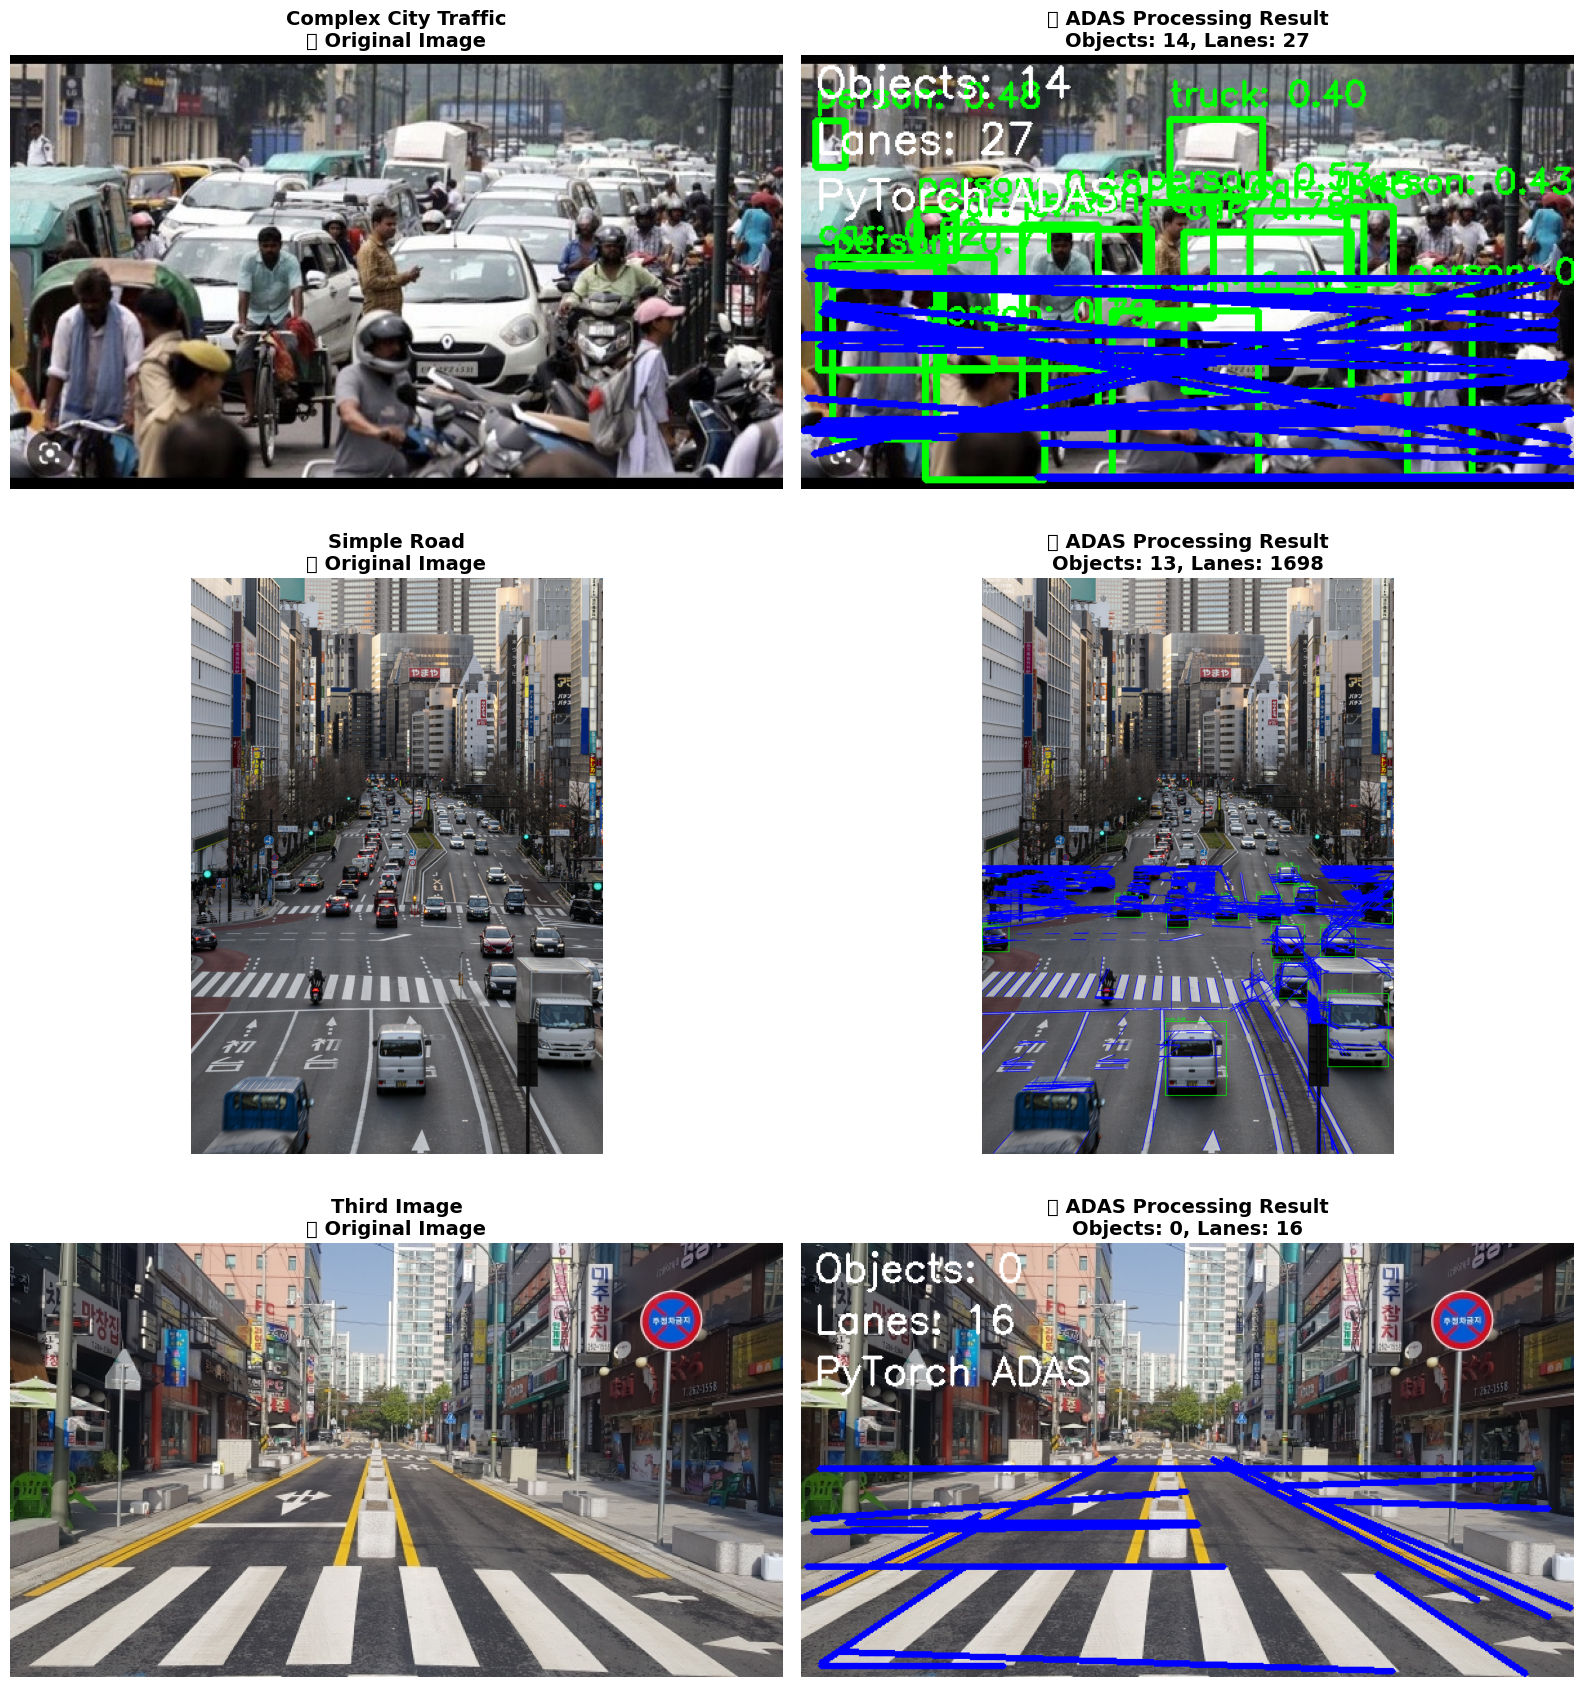

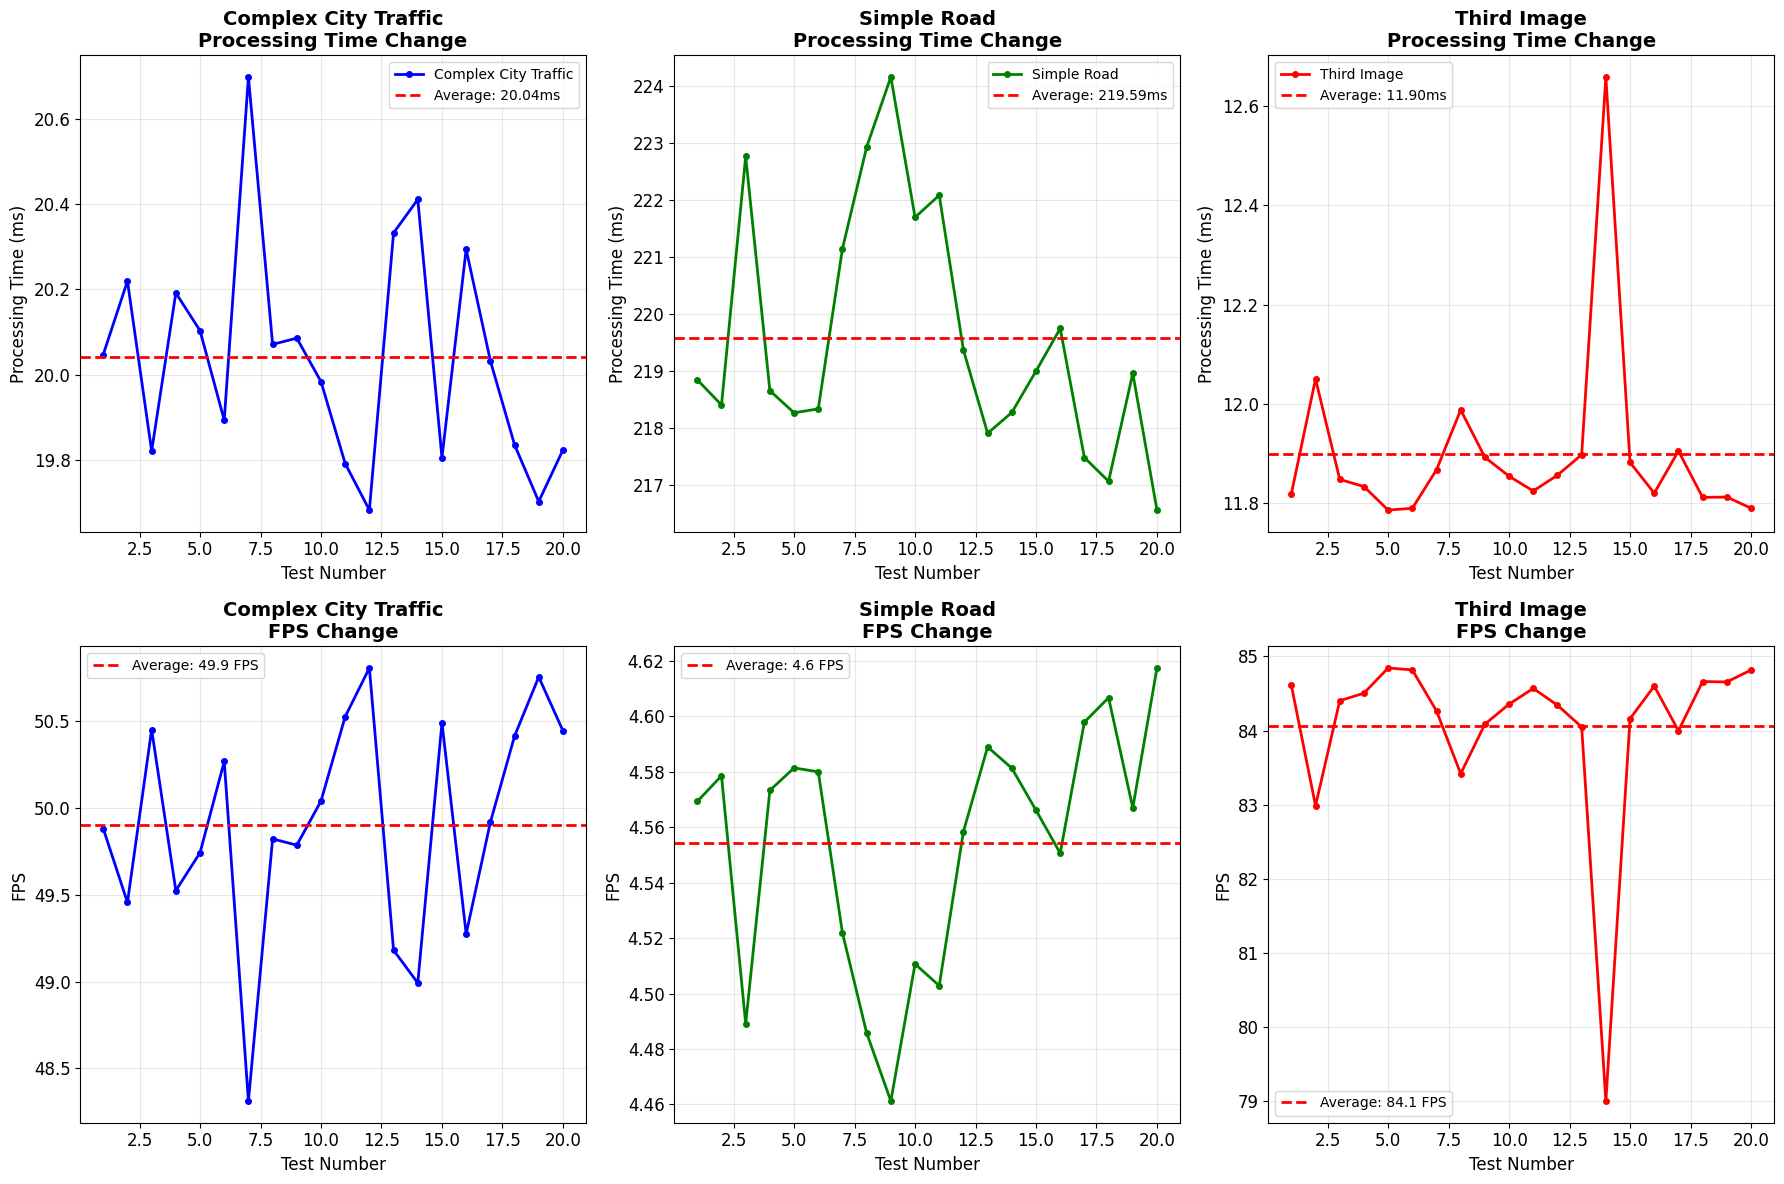


🏁 PyTorch ADAS Comprehensive Performance Analysis
Image Type           Objects  Lanes  Avg Time(ms)  Avg FPS  Max FPS  Stability 
--------------------------------------------------------------------------------------------------------------
Complex City Traffic 14       27     20.04         49.9     50.8     1.3%      
Simple Road          13       1698   219.59        4.6      4.6      0.9%      
Third Image          0        16     11.90         84.1     84.8     1.6%      

📊 Overall Performance Summary:
   Average Processing Time: 83.84ms
   Average FPS: 11.9
   Total Measurements: 60 iterations

🚀 Next Step: TensorRT Conversion
   Expected Performance Improvement: 2-4x
   Expected Processing Time: 27.95ms
   Expected FPS: 35.8


In [16]:
import sys
sys.path.append('/workspace/adas_project/src')
from adas_system import ADASSystem
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Image paths
image_paths = [
    '/workspace/1.jpg',      # Complex city traffic
    '/workspace/2.jpg',      # Simple road  
    '/workspace/3.jpg'       # Third image
]

image_names = ['Complex City Traffic', 'Simple Road', 'Third Image']

# ADAS system initialization
print("🚗 ADAS System Initialization...")
adas = ADASSystem()

# Store all results
all_results = {}
processed_images = {}

for img_path, img_name in zip(image_paths, image_names):
    print(f"\n" + "="*70)
    print(f"📸 {img_name} Performance Test")
    print("="*70)
    
    # Load image
    test_img = cv2.imread(img_path)
    if test_img is None:
        print(f"❌ Failed to load {img_path}")
        continue
    
    print(f"✅ Image loaded successfully: {test_img.shape}")
    
    # Warmup (3 times)
    print("🔥 Warming up...")
    for i in range(3):
        _ = adas.process_frame(test_img)
    
    print("🚀 Starting performance measurement (20 iterations)")
    
    times = []
    fps_list = []
    
    # First processing result for visualization
    first_result = adas.process_frame(test_img)
    
    # Generate ADAS processed image
    processed_img = test_img.copy()
    detected_count = 0
    
    # Object detection visualization
    if first_result['objects'] and len(first_result['objects']) > 0:
        for detection in first_result['objects']:
            boxes = detection.boxes
            if boxes is not None:
                for box in boxes:
                    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                    conf = box.conf[0].cpu().numpy()
                    cls = int(box.cls[0].cpu().numpy())
                    
                    if conf > 0.4:  # Confidence threshold 40%
                        detected_count += 1
                        class_name = adas.object_detector.names[cls]
                        
                        # Bounding box
                        cv2.rectangle(processed_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)
                        # Label
                        cv2.putText(processed_img, f'{class_name}: {conf:.2f}', 
                                  (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    
    # Lane detection visualization
    lane_count = 0
    if first_result['lanes'] is not None:
        lane_count = len(first_result['lanes'])
        for line in first_result['lanes']:
            x1, y1, x2, y2 = line[0]
            cv2.line(processed_img, (x1, y1), (x2, y2), (255, 0, 0), 4)
    
    # Performance info overlay
    cv2.putText(processed_img, f'Objects: {detected_count}', (10, 30), 
               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.putText(processed_img, f'Lanes: {lane_count}', (10, 70), 
               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.putText(processed_img, f'PyTorch ADAS', (10, 110), 
               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Store processed image
    processed_images[img_name] = {
        'original': test_img,
        'processed': processed_img,
        'detected_objects': detected_count,
        'detected_lanes': lane_count
    }
    
    # Remaining 19 performance measurements
    times.append(first_result['processing_time_ms'])
    fps_list.append(first_result['fps'])
    
    for i in range(19):
        result = adas.process_frame(test_img)
        times.append(result['processing_time_ms'])
        fps_list.append(result['fps'])
        
        if (i + 6) % 5 == 0:  # +6 because we already did 1
            avg_so_far = np.mean(times)
            print(f"✅ {len(times)}/20 completed - Current avg: {avg_so_far:.2f}ms, {1000/avg_so_far:.1f} FPS")
    
    # Result analysis
    avg_time = np.mean(times)
    min_time = np.min(times)
    max_time = np.max(times)
    std_time = np.std(times)
    avg_fps = np.mean(fps_list)
    max_fps = np.max(fps_list)
    
    # Store results
    all_results[img_name] = {
        'times': times,
        'fps_list': fps_list,
        'avg_time': avg_time,
        'avg_fps': avg_fps,
        'min_time': min_time,
        'max_time': max_time,
        'std_time': std_time,
        'max_fps': max_fps,
        'image_shape': test_img.shape
    }
    
    print(f"\n🎯 {img_name} Final Results:")
    print(f"   Average Processing Time: {avg_time:.2f}ms")
    print(f"   Average FPS: {avg_fps:.1f}")
    print(f"   Detected Objects: {detected_count}")
    print(f"   Detected Lanes: {lane_count}")

# Original vs Processed Results Visualization
if processed_images:
    num_images = len(processed_images)
    fig, axes = plt.subplots(num_images, 2, figsize=(16, 6*num_images))
    
    if num_images == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (img_name, img_data) in enumerate(processed_images.items()):
        # Original image
        axes[idx, 0].imshow(cv2.cvtColor(img_data['original'], cv2.COLOR_BGR2RGB))
        axes[idx, 0].set_title(f'{img_name}\n📸 Original Image', fontsize=14, fontweight='bold')
        axes[idx, 0].axis('off')
        
        # ADAS processed result
        axes[idx, 1].imshow(cv2.cvtColor(img_data['processed'], cv2.COLOR_BGR2RGB))
        result_info = f"🤖 ADAS Processing Result\nObjects: {img_data['detected_objects']}, Lanes: {img_data['detected_lanes']}"
        axes[idx, 1].set_title(result_info, fontsize=14, fontweight='bold')
        axes[idx, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Performance graphs (cleaner version)
if all_results:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Top row: Processing time comparison
    colors = ['blue', 'green', 'red']
    for idx, (img_name, results) in enumerate(all_results.items()):
        axes[0, idx].plot(range(1, 21), results['times'], f'{colors[idx][0]}-o', 
                         linewidth=2, markersize=4, label=img_name)
        axes[0, idx].axhline(y=results['avg_time'], color='red', linestyle='--', 
                           linewidth=2, label=f'Average: {results["avg_time"]:.2f}ms')
        axes[0, idx].set_title(f'{img_name}\nProcessing Time Change', fontweight='bold')
        axes[0, idx].set_xlabel('Test Number')
        axes[0, idx].set_ylabel('Processing Time (ms)')
        axes[0, idx].grid(True, alpha=0.3)
        axes[0, idx].legend()
    
    # Bottom row: FPS comparison
    for idx, (img_name, results) in enumerate(all_results.items()):
        axes[1, idx].plot(range(1, 21), results['fps_list'], f'{colors[idx][0]}-o', 
                         linewidth=2, markersize=4)
        axes[1, idx].axhline(y=results['avg_fps'], color='red', linestyle='--',
                           linewidth=2, label=f'Average: {results["avg_fps"]:.1f} FPS')
        axes[1, idx].set_title(f'{img_name}\nFPS Change', fontweight='bold')
        axes[1, idx].set_xlabel('Test Number')
        axes[1, idx].set_ylabel('FPS')
        axes[1, idx].grid(True, alpha=0.3)
        axes[1, idx].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Comprehensive comparison table
    print("\n" + "="*110)
    print("🏁 PyTorch ADAS Comprehensive Performance Analysis")
    print("="*110)
    
    print(f"{'Image Type':<20} {'Objects':<8} {'Lanes':<6} {'Avg Time(ms)':<13} {'Avg FPS':<8} {'Max FPS':<8} {'Stability':<10}")
    print("-" * 110)
    
    for img_name in all_results.keys():
        results = all_results[img_name]
        img_data = processed_images[img_name]
        stability = f"{(results['std_time']/results['avg_time']*100):.1f}%"
        
        print(f"{img_name:<20} {img_data['detected_objects']:<8} {img_data['detected_lanes']:<6} "
              f"{results['avg_time']:<13.2f} {results['avg_fps']:<8.1f} "
              f"{results['max_fps']:<8.1f} {stability:<10}")
    
    print(f"\n📊 Overall Performance Summary:")
    all_times = [t for results in all_results.values() for t in results['times']]
    print(f"   Average Processing Time: {np.mean(all_times):.2f}ms")
    print(f"   Average FPS: {1000/np.mean(all_times):.1f}")
    print(f"   Total Measurements: {len(all_times)} iterations")
    
    print(f"\n🚀 Next Step: TensorRT Conversion")
    print(f"   Expected Performance Improvement: 2-4x")
    print(f"   Expected Processing Time: {np.mean(all_times)/3:.2f}ms")
    print(f"   Expected FPS: {3000/np.mean(all_times):.1f}")

else:
    print("❌ No images to process.")

🚗 ADAS System Initialization...
ADAS 시스템 초기화 중... (백엔드: pytorch)
YOLO 모델 다운로드 중...
✅ PyTorch YOLO 모델 로드 완료

📸 Complex City Traffic Performance Test
✅ Image loaded successfully: (309, 550, 3)
🔥 Warming up...
🚀 Starting performance measurement (20 iterations)
✅ 6/20 completed - Current avg: 16.14ms
✅ 11/20 completed - Current avg: 15.17ms
✅ 16/20 completed - Current avg: 14.83ms

🎯 Complex City Traffic Final Results:
   Average Processing Time: 14.66ms
   Average FPS: 68.9

📸 Simple Road Performance Test
✅ Image loaded successfully: (4045, 2890, 3)
🔥 Warming up...
🚀 Starting performance measurement (20 iterations)
✅ 6/20 completed - Current avg: 213.53ms
✅ 11/20 completed - Current avg: 215.04ms
✅ 16/20 completed - Current avg: 214.65ms

🎯 Simple Road Final Results:
   Average Processing Time: 214.48ms
   Average FPS: 4.7

📸 Third Image Performance Test
✅ Image loaded successfully: (337, 600, 3)
🔥 Warming up...
🚀 Starting performance measurement (20 iterations)
✅ 6/20 completed - Current

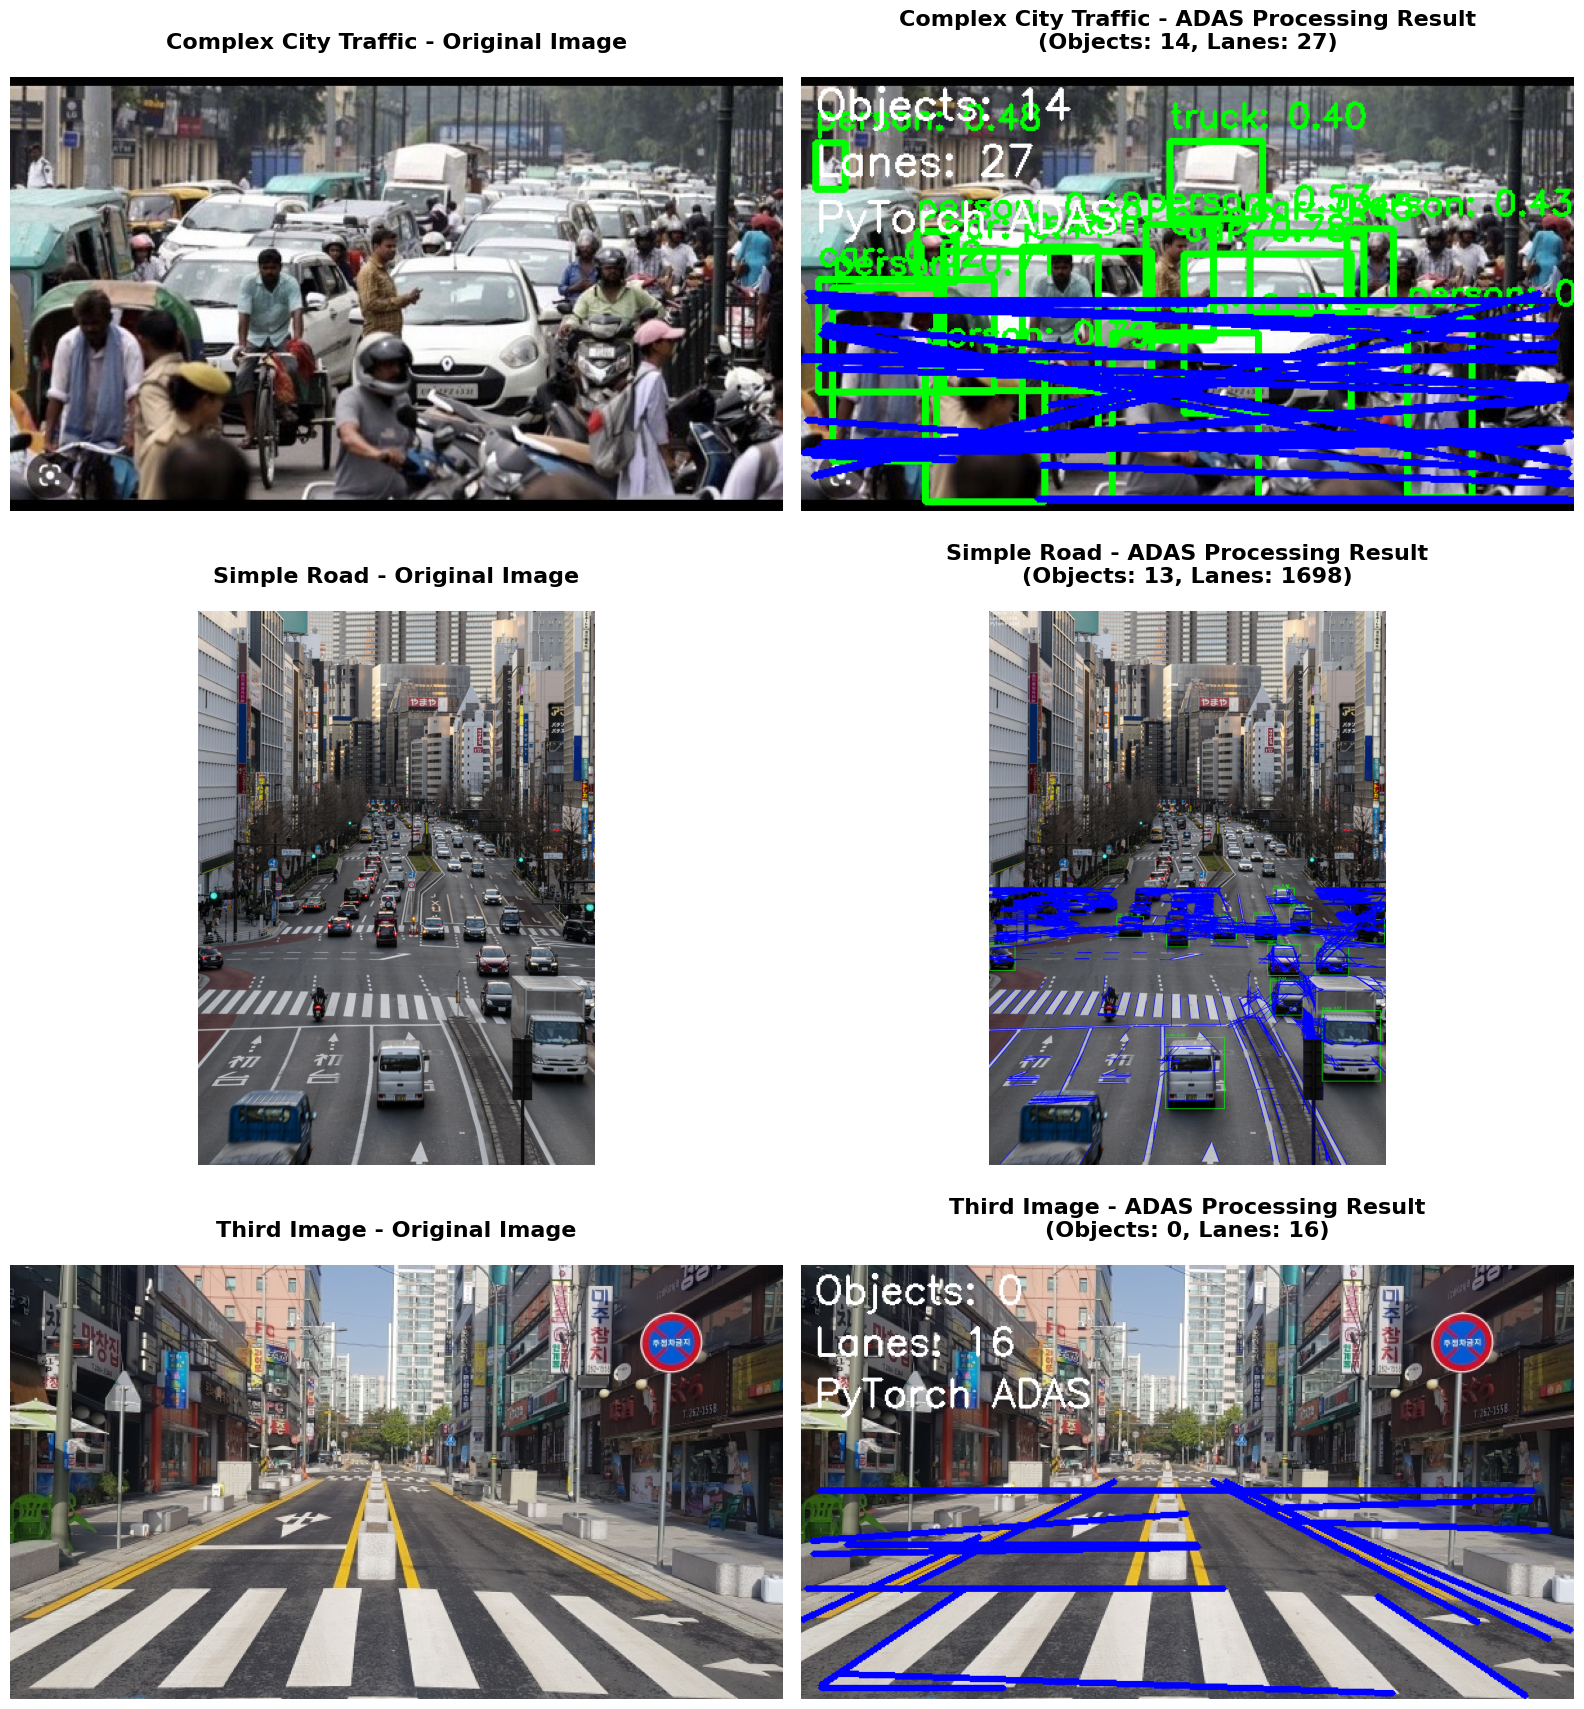

/tmp/ipykernel_12845/294405833.py:256: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/294405833.py:256: UserWarning: Glyph 12305 (\N{RIGHT BLACK LENTICULAR BRACKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/294405833.py:256: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/294405833.py:256: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/294405833.py:256: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/294405833.py:256: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12845/294405833.py:256: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaV

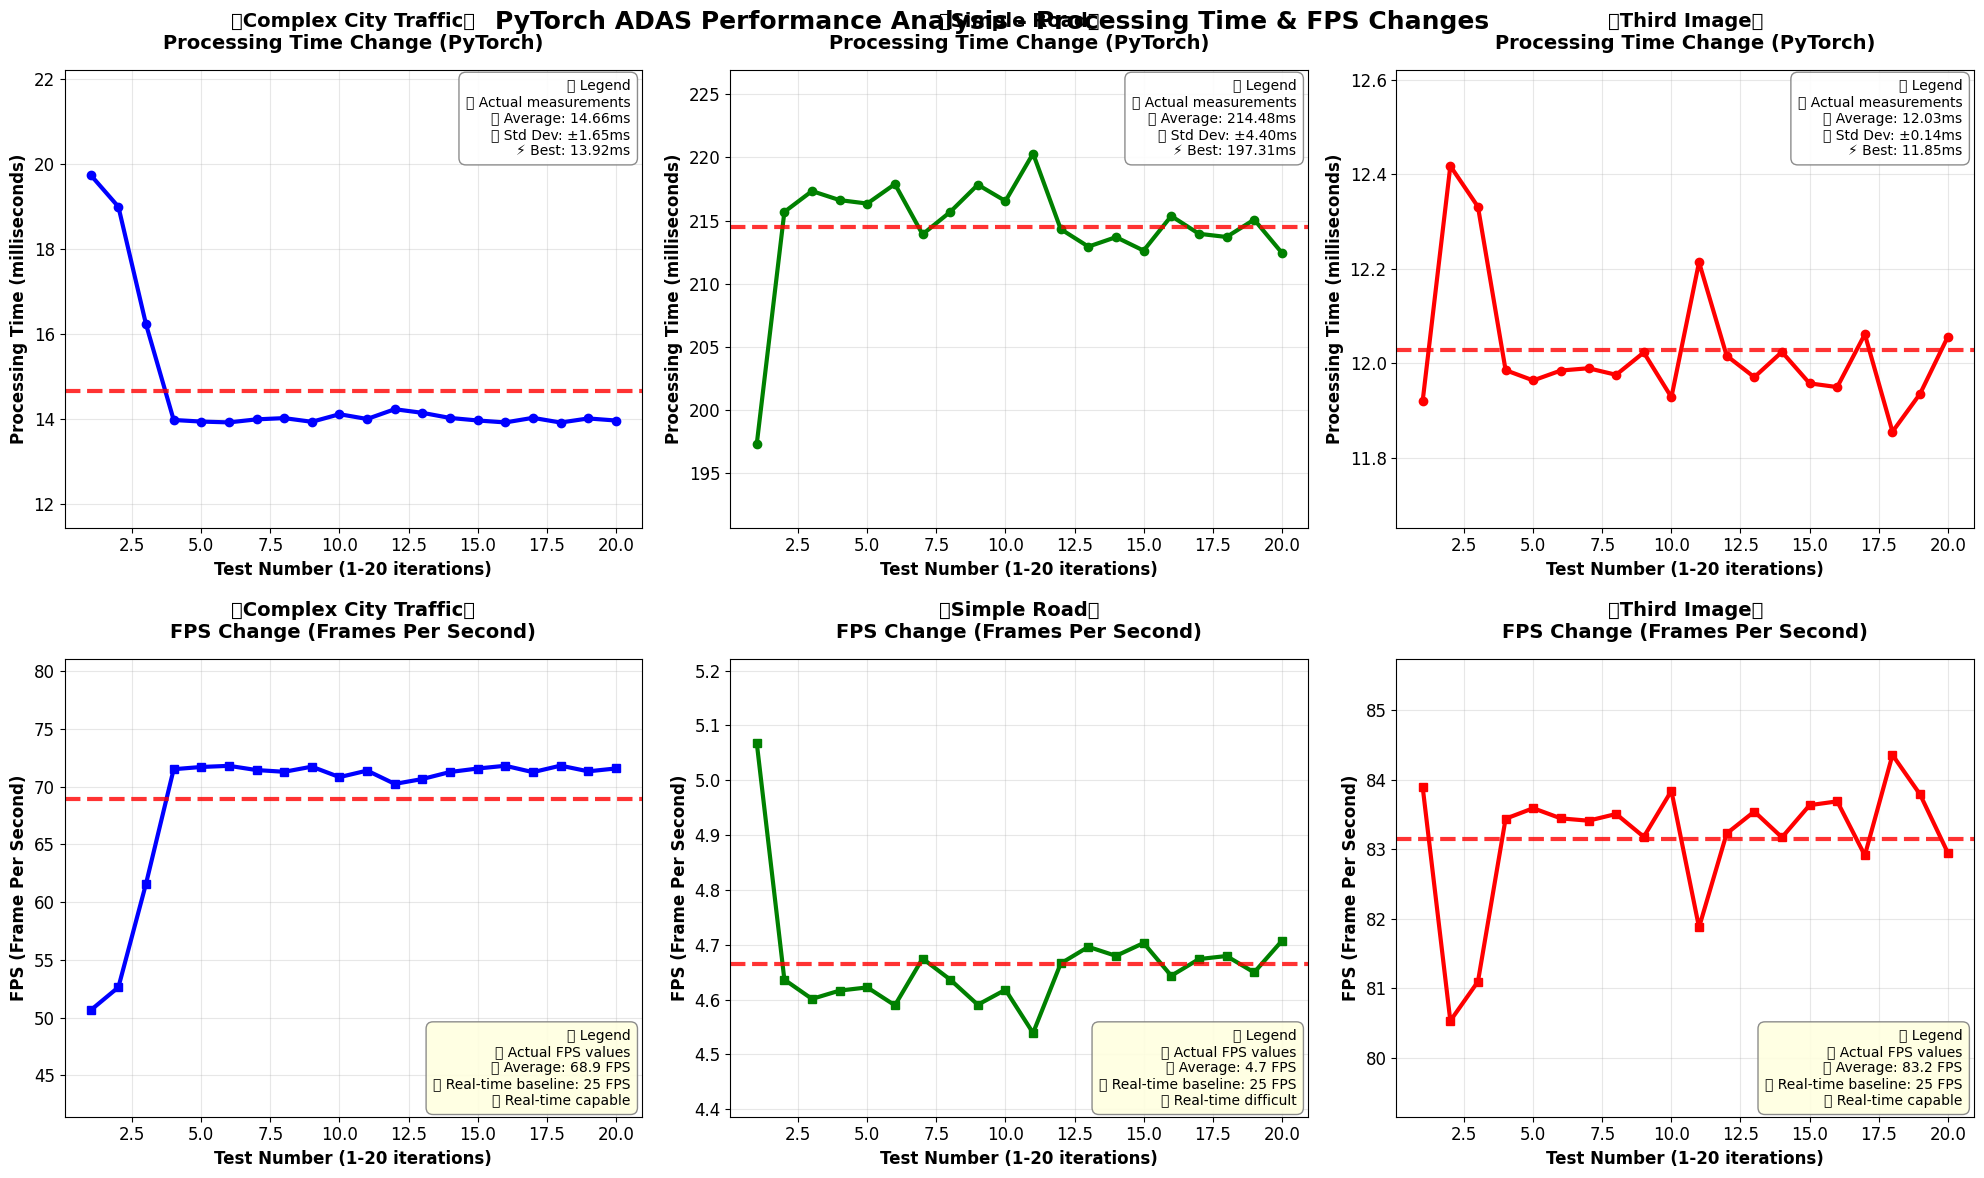


🏁 PyTorch ADAS Comprehensive Performance Analysis Results
No.  Image Type           Objects  Lanes  Avg Time(ms)  Avg FPS  Max FPS  Real-time 
------------------------------------------------------------------------------------------------------------------------
1    Complex City Traffic 14       27     14.66         68.9     71.8     ✅ Yes     
2    Simple Road          13       1698   214.48        4.7      5.1      ❌ No      
3    Third Image          0        16     12.03         83.2     84.4     ✅ Yes     

📊 PyTorch Overall Performance Summary:
   Total measurements: 60 iterations
   Overall average processing time: 80.39ms
   Overall average FPS: 12.4
   Real-time processing capability: ❌ Difficult

🚀 Next Step: TensorRT Conversion & Performance Comparison
   Current PyTorch baseline: 80.39ms
   TensorRT target: 26.80ms (3x improvement expected)


In [15]:
import sys
sys.path.append('/workspace/adas_project/src')
from adas_system import ADASSystem
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# English font settings for clarity
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10

# Image paths
image_paths = [
    '/workspace/1.jpg',      # Complex city traffic
    '/workspace/2.jpg',      # Simple road  
    '/workspace/3.jpg'       # Third image
]

image_names = ['Complex City Traffic', 'Simple Road', 'Third Image']

# ADAS system initialization
print("🚗 ADAS System Initialization...")
adas = ADASSystem()

# Store all results
all_results = {}
processed_images = {}

for img_path, img_name in zip(image_paths, image_names):
    print(f"\n" + "="*70)
    print(f"📸 {img_name} Performance Test")
    print("="*70)
    
    # Load image
    test_img = cv2.imread(img_path)
    if test_img is None:
        print(f"❌ Failed to load {img_path}")
        continue
    
    print(f"✅ Image loaded successfully: {test_img.shape}")
    
    # Warmup (3 times)
    print("🔥 Warming up...")
    for i in range(3):
        _ = adas.process_frame(test_img)
    
    print("🚀 Starting performance measurement (20 iterations)")
    
    times = []
    fps_list = []
    
    # First processing result for visualization
    first_result = adas.process_frame(test_img)
    
    # Generate ADAS processed image
    processed_img = test_img.copy()
    detected_count = 0
    
    # Object detection visualization
    if first_result['objects'] and len(first_result['objects']) > 0:
        for detection in first_result['objects']:
            boxes = detection.boxes
            if boxes is not None:
                for box in boxes:
                    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                    conf = box.conf[0].cpu().numpy()
                    cls = int(box.cls[0].cpu().numpy())
                    
                    if conf > 0.4:  # Confidence threshold 40%
                        detected_count += 1
                        class_name = adas.object_detector.names[cls]
                        
                        # Bounding box
                        cv2.rectangle(processed_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)
                        # Label
                        cv2.putText(processed_img, f'{class_name}: {conf:.2f}', 
                                  (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    
    # Lane detection visualization
    lane_count = 0
    if first_result['lanes'] is not None:
        lane_count = len(first_result['lanes'])
        for line in first_result['lanes']:
            x1, y1, x2, y2 = line[0]
            cv2.line(processed_img, (x1, y1), (x2, y2), (255, 0, 0), 4)
    
    # Performance info overlay
    cv2.putText(processed_img, f'Objects: {detected_count}', (10, 30), 
               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.putText(processed_img, f'Lanes: {lane_count}', (10, 70), 
               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.putText(processed_img, f'PyTorch ADAS', (10, 110), 
               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Store processed image
    processed_images[img_name] = {
        'original': test_img,
        'processed': processed_img,
        'detected_objects': detected_count,
        'detected_lanes': lane_count
    }
    
    # Remaining 19 performance measurements
    times.append(first_result['processing_time_ms'])
    fps_list.append(first_result['fps'])
    
    for i in range(19):
        result = adas.process_frame(test_img)
        times.append(result['processing_time_ms'])
        fps_list.append(result['fps'])
        
        if (i + 6) % 5 == 0:  # +6 because we already did 1
            avg_so_far = np.mean(times)
            print(f"✅ {len(times)}/20 completed - Current avg: {avg_so_far:.2f}ms")
    
    # Result analysis
    avg_time = np.mean(times)
    min_time = np.min(times)
    max_time = np.max(times)
    std_time = np.std(times)
    avg_fps = np.mean(fps_list)
    max_fps = np.max(fps_list)
    
    # Store results
    all_results[img_name] = {
        'times': times,
        'fps_list': fps_list,
        'avg_time': avg_time,
        'avg_fps': avg_fps,
        'min_time': min_time,
        'max_time': max_time,
        'std_time': std_time,
        'max_fps': max_fps,
        'image_shape': test_img.shape
    }
    
    print(f"\n🎯 {img_name} Final Results:")
    print(f"   Average Processing Time: {avg_time:.2f}ms")
    print(f"   Average FPS: {avg_fps:.1f}")

# Original vs Processed Results Visualization
if processed_images:
    num_images = len(processed_images)
    fig, axes = plt.subplots(num_images, 2, figsize=(16, 6*num_images))
    
    if num_images == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (img_name, img_data) in enumerate(processed_images.items()):
        # Original image
        axes[idx, 0].imshow(cv2.cvtColor(img_data['original'], cv2.COLOR_BGR2RGB))
        axes[idx, 0].set_title(f'{img_name} - Original Image', fontsize=16, fontweight='bold', pad=20)
        axes[idx, 0].axis('off')
        
        # ADAS processed result
        axes[idx, 1].imshow(cv2.cvtColor(img_data['processed'], cv2.COLOR_BGR2RGB))
        result_info = f"{img_name} - ADAS Processing Result\n(Objects: {img_data['detected_objects']}, Lanes: {img_data['detected_lanes']})"
        axes[idx, 1].set_title(result_info, fontsize=16, fontweight='bold', pad=20)
        axes[idx, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Performance graphs with clear titles and labels
if all_results:
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    colors = ['blue', 'green', 'red']
    
    # Top row: Processing time graphs
    for idx, (img_name, results) in enumerate(all_results.items()):
        # Actual data points
        axes[0, idx].plot(range(1, 21), results['times'], 
                         color=colors[idx], marker='o', linewidth=3, markersize=6)
        
        # Average line
        axes[0, idx].axhline(y=results['avg_time'], color='red', linestyle='--', 
                           linewidth=3, alpha=0.8)
        
        # Title and labels (very clear)
        axes[0, idx].set_title(f'【{img_name}】\nProcessing Time Change (PyTorch)', 
                              fontsize=14, fontweight='bold', pad=15)
        axes[0, idx].set_xlabel('Test Number (1-20 iterations)', fontsize=12, fontweight='bold')
        axes[0, idx].set_ylabel('Processing Time (milliseconds)', fontsize=12, fontweight='bold')
        
        # Text legend directly on graph
        legend_text = f"""📊 Legend
🔵 Actual measurements
🔴 Average: {results['avg_time']:.2f}ms
📈 Std Dev: ±{results['std_time']:.2f}ms
⚡ Best: {results['min_time']:.2f}ms"""
        
        axes[0, idx].text(0.98, 0.98, legend_text, 
                         transform=axes[0, idx].transAxes, fontsize=10,
                         verticalalignment='top', horizontalalignment='right',
                         bbox=dict(boxstyle="round,pad=0.5", facecolor="white", 
                                 alpha=0.9, edgecolor='gray'))
        
        axes[0, idx].grid(True, alpha=0.3)
        
        # Y-axis range adjustment
        margin = results['std_time'] * 1.5
        axes[0, idx].set_ylim(results['min_time'] - margin, results['max_time'] + margin)
    
    # Bottom row: FPS graphs
    for idx, (img_name, results) in enumerate(all_results.items()):
        # Actual FPS measurements
        axes[1, idx].plot(range(1, 21), results['fps_list'], 
                         color=colors[idx], marker='s', linewidth=3, markersize=6)
        
        # Average FPS line
        axes[1, idx].axhline(y=results['avg_fps'], color='red', linestyle='--',
                           linewidth=3, alpha=0.8)
        
        # Real-time processing baseline (25 FPS)
        axes[1, idx].axhline(y=25, color='orange', linestyle=':', 
                           linewidth=3, alpha=0.8)
        
        # Title and labels
        axes[1, idx].set_title(f'【{img_name}】\nFPS Change (Frames Per Second)', 
                              fontsize=14, fontweight='bold', pad=15)
        axes[1, idx].set_xlabel('Test Number (1-20 iterations)', fontsize=12, fontweight='bold')
        axes[1, idx].set_ylabel('FPS (Frame Per Second)', fontsize=12, fontweight='bold')
        
        # Real-time processing capability
        realtime_status = "✅ Real-time capable" if results['avg_fps'] > 25 else "❌ Real-time difficult"
        
        # Text legend directly on graph
        legend_text = f"""📊 Legend
🟦 Actual FPS values
🔴 Average: {results['avg_fps']:.1f} FPS
🟠 Real-time baseline: 25 FPS
{realtime_status}"""
        
        axes[1, idx].text(0.98, 0.02, legend_text, 
                         transform=axes[1, idx].transAxes, fontsize=10,
                         verticalalignment='bottom', horizontalalignment='right',
                         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", 
                                 alpha=0.9, edgecolor='gray'))
        
        axes[1, idx].grid(True, alpha=0.3)
        
        # Y-axis range adjustment
        fps_margin = np.std(results['fps_list']) * 1.5
        y_min = max(0, min(results['fps_list']) - fps_margin)
        y_max = max(results['fps_list']) + fps_margin
        axes[1, idx].set_ylim(y_min, y_max)
    
    # Overall title
    fig.suptitle('PyTorch ADAS Performance Analysis - Processing Time & FPS Changes', 
                fontsize=18, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)  # Space for overall title
    plt.show()
    
    # Comprehensive comparison table
    print("\n" + "="*120)
    print("🏁 PyTorch ADAS Comprehensive Performance Analysis Results")
    print("="*120)
    
    print(f"{'No.':<4} {'Image Type':<20} {'Objects':<8} {'Lanes':<6} {'Avg Time(ms)':<13} {'Avg FPS':<8} {'Max FPS':<8} {'Real-time':<10}")
    print("-" * 120)
    
    for i, img_name in enumerate(all_results.keys(), 1):
        results = all_results[img_name]
        img_data = processed_images[img_name]
        realtime = "✅ Yes" if results['avg_fps'] > 25 else "❌ No"
        
        print(f"{i:<4} {img_name:<20} {img_data['detected_objects']:<8} {img_data['detected_lanes']:<6} "
              f"{results['avg_time']:<13.2f} {results['avg_fps']:<8.1f} "
              f"{results['max_fps']:<8.1f} {realtime:<10}")
    
    # Performance summary
    all_times = [t for results in all_results.values() for t in results['times']]
    overall_avg = np.mean(all_times)
    
    print(f"\n📊 PyTorch Overall Performance Summary:")
    print(f"   Total measurements: {len(all_times)} iterations")
    print(f"   Overall average processing time: {overall_avg:.2f}ms")
    print(f"   Overall average FPS: {1000/overall_avg:.1f}")
    print(f"   Real-time processing capability: {'✅ Capable' if 1000/overall_avg > 25 else '❌ Difficult'}")
    
    print(f"\n🚀 Next Step: TensorRT Conversion & Performance Comparison")
    print(f"   Current PyTorch baseline: {overall_avg:.2f}ms")
    print(f"   TensorRT target: {overall_avg/3:.2f}ms (3x improvement expected)")

else:
    print("❌ No images to process.")

ADAS 시스템 초기화 중... (백엔드: pytorch)
YOLO 모델 다운로드 중...
✅ PyTorch YOLO 모델 로드 완료
🔍 Detailed Analysis by Image Type

📸 Complex City Traffic Analysis:
   Image Size: (309, 550, 3) (169,950 pixels)
   Total Processing: 14.50ms
   Object Detection: 7.39ms (51.0%)
   Lane Detection:   7.11ms (49.0%)
   Detected Objects: 14
   Detected Lanes:   27
   Final FPS:        69.0

📸 Simple Road Analysis:
   Image Size: (4045, 2890, 3) (11,690,050 pixels)
   Total Processing: 212.97ms
   Object Detection: 10.78ms (5.1%)
   Lane Detection:   202.18ms (94.9%)
   Detected Objects: 13
   Detected Lanes:   1698
   Final FPS:        4.7

📸 Third Image Analysis:
   Image Size: (337, 600, 3) (202,200 pixels)
   Total Processing: 11.75ms
   Object Detection: 6.81ms (58.0%)
   Lane Detection:   4.94ms (42.0%)
   Detected Objects: 0
   Detected Lanes:   16
   Final FPS:        85.1

📊 Detailed Comparison Analysis
Image Type           Resolution   Pixels   Obj Time   Lane Time   Total Time   FPS     
----------------

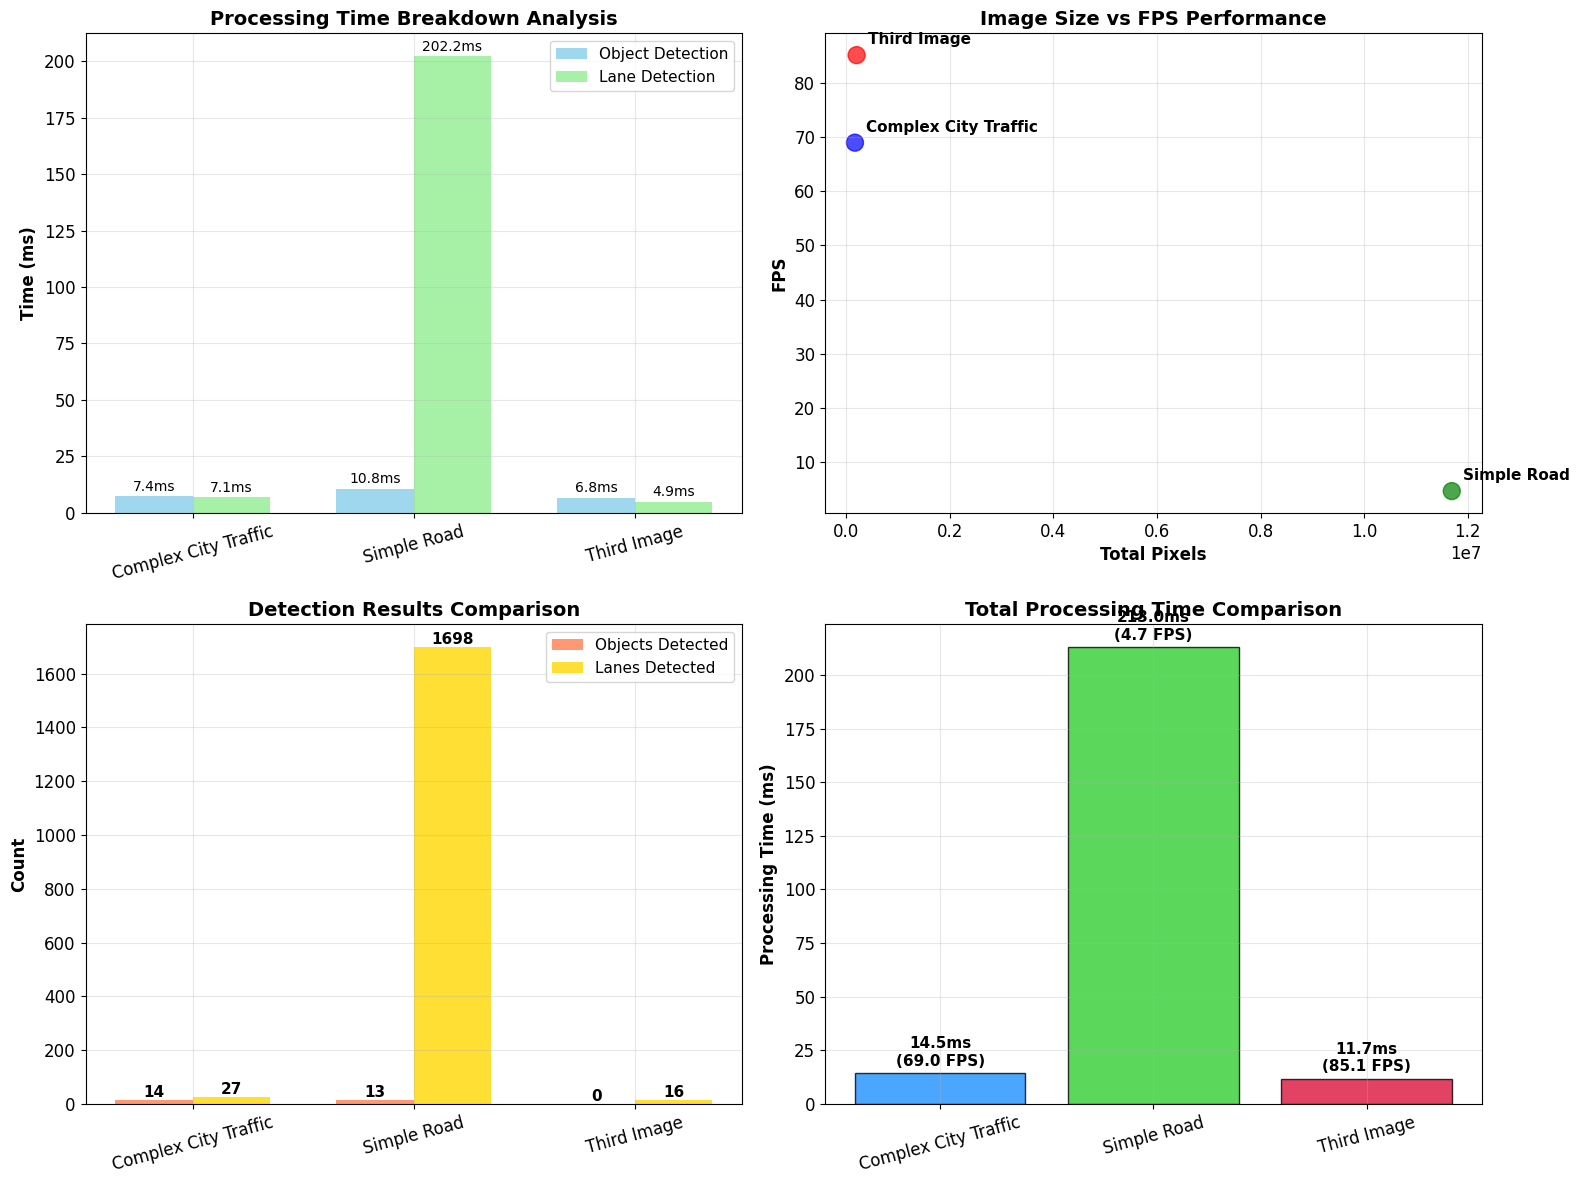


🎯 Performance Difference Root Cause Analysis:
Slowest Image: Simple Road (212.97ms)
Fastest Image: Third Image (11.75ms)
Performance Gap: 18.1x slower

🔍 Possible Causes:
1. Image Resolution: (4045, 2890, 3) vs (337, 600, 3)
2. Total Pixels: 11,690,050 vs 202,200
3. Lane Detection Load: 202.18ms vs 4.94ms
4. Object Detection Load: 10.78ms vs 6.81ms

📊 Processing Time Breakdown for 'Simple Road':
   Object Detection: 10.78ms (5.1%)
   Lane Detection:   202.18ms (94.9%)
   Other Processing: 0.0%

💡 Key Findings:
   ⚠️  Lane detection is the major bottleneck!
   → Possible cause: Too many/clear lane markings requiring intensive Hough Transform

🚀 Next Step: TensorRT Optimization
   Current PyTorch Baseline: 79.74ms
   Expected TensorRT Performance: 26.58ms (3x improvement)


In [14]:
import sys
sys.path.append('/workspace/adas_project/src')
from adas_system import ADASSystem
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# English labels and clear display
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Image paths
image_paths = ['/workspace/1.jpg', '/workspace/2.jpg', '/workspace/3.jpg']
image_names = ['Complex City Traffic', 'Simple Road', 'Third Image']

adas = ADASSystem()

print("🔍 Detailed Analysis by Image Type")
print("="*80)

detailed_analysis = {}

for img_path, img_name in zip(image_paths, image_names):
    img = cv2.imread(img_path)
    if img is None:
        continue
        
    print(f"\n📸 {img_name} Analysis:")
    print(f"   Image Size: {img.shape} ({img.shape[0] * img.shape[1]:,} pixels)")
    
    # Warmup
    for _ in range(3):
        _ = adas.process_frame(img)
    
    # Detailed timing measurement
    total_times = []
    object_times = []
    lane_times = []
    
    for i in range(10):
        # Total time
        start_total = time.time()
        
        # Object detection time only
        start_obj = time.time()
        objects = adas.detect_objects(img)
        obj_time = (time.time() - start_obj) * 1000
        
        # Lane detection time only
        start_lane = time.time()
        lanes = adas.detect_lanes(img)
        lane_time = (time.time() - start_lane) * 1000
        
        total_time = (time.time() - start_total) * 1000
        
        total_times.append(total_time)
        object_times.append(obj_time)
        lane_times.append(lane_time)
    
    # Count detections
    detected_objects = 0
    if objects and len(objects) > 0:
        for detection in objects:
            if detection.boxes is not None:
                detected_objects += len([box for box in detection.boxes if box.conf[0] > 0.4])
    
    lane_count = len(lanes) if lanes is not None else 0
    
    # Store results
    detailed_analysis[img_name] = {
        'image_size': img.shape,
        'total_pixels': img.shape[0] * img.shape[1],
        'avg_total_time': np.mean(total_times),
        'avg_object_time': np.mean(object_times),
        'avg_lane_time': np.mean(lane_times),
        'detected_objects': detected_objects,
        'detected_lanes': lane_count,
        'fps': 1000 / np.mean(total_times)
    }
    
    print(f"   Total Processing: {np.mean(total_times):.2f}ms")
    print(f"   Object Detection: {np.mean(object_times):.2f}ms ({np.mean(object_times)/np.mean(total_times)*100:.1f}%)")
    print(f"   Lane Detection:   {np.mean(lane_times):.2f}ms ({np.mean(lane_times)/np.mean(total_times)*100:.1f}%)")
    print(f"   Detected Objects: {detected_objects}")
    print(f"   Detected Lanes:   {lane_count}")
    print(f"   Final FPS:        {1000/np.mean(total_times):.1f}")

# Comparison analysis
print(f"\n📊 Detailed Comparison Analysis")
print("="*110)
print(f"{'Image Type':<20} {'Resolution':<12} {'Pixels':<8} {'Obj Time':<10} {'Lane Time':<11} {'Total Time':<12} {'FPS':<8}")
print("-"*110)

for name, data in detailed_analysis.items():
    size_str = f"{data['image_size'][1]}x{data['image_size'][0]}"
    pixel_str = f"{data['total_pixels']/1000000:.1f}M"
    
    print(f"{name:<20} {size_str:<12} {pixel_str:<8} {data['avg_object_time']:<10.2f} "
          f"{data['avg_lane_time']:<11.2f} {data['avg_total_time']:<12.2f} {data['fps']:<8.1f}")

# Visualization with English labels
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Processing time breakdown
names = list(detailed_analysis.keys())
obj_times = [data['avg_object_time'] for data in detailed_analysis.values()]
lane_times = [data['avg_lane_time'] for data in detailed_analysis.values()]

x = np.arange(len(names))
width = 0.35

bars1 = axes[0, 0].bar(x - width/2, obj_times, width, label='Object Detection', color='skyblue', alpha=0.8)
bars2 = axes[0, 0].bar(x + width/2, lane_times, width, label='Lane Detection', color='lightgreen', alpha=0.8)

# Add value labels on bars
for bar, val in zip(bars1, obj_times):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{val:.1f}ms', ha='center', va='bottom', fontsize=10)

for bar, val in zip(bars2, lane_times):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{val:.1f}ms', ha='center', va='bottom', fontsize=10)

axes[0, 0].set_title('Processing Time Breakdown Analysis', fontweight='bold', fontsize=14)
axes[0, 0].set_ylabel('Time (ms)', fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(names, rotation=15)
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# 2. Image size vs Performance
pixels = [data['total_pixels'] for data in detailed_analysis.values()]
fps_values = [data['fps'] for data in detailed_analysis.values()]

scatter = axes[0, 1].scatter(pixels, fps_values, s=150, alpha=0.7, c=['blue', 'green', 'red'])
for i, name in enumerate(names):
    axes[0, 1].annotate(name, (pixels[i], fps_values[i]), 
                       xytext=(8, 8), textcoords='offset points', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Image Size vs FPS Performance', fontweight='bold', fontsize=14)
axes[0, 1].set_xlabel('Total Pixels', fontweight='bold')
axes[0, 1].set_ylabel('FPS', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Detection count comparison
objects_count = [data['detected_objects'] for data in detailed_analysis.values()]
lanes_count = [data['detected_lanes'] for data in detailed_analysis.values()]

bars3 = axes[1, 0].bar(x - width/2, objects_count, width, label='Objects Detected', color='coral', alpha=0.8)
bars4 = axes[1, 0].bar(x + width/2, lanes_count, width, label='Lanes Detected', color='gold', alpha=0.8)

# Add value labels
for bar, val in zip(bars3, objects_count):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{val}', ha='center', va='bottom', fontsize=11, fontweight='bold')

for bar, val in zip(bars4, lanes_count):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{val}', ha='center', va='bottom', fontsize=11, fontweight='bold')

axes[1, 0].set_title('Detection Results Comparison', fontweight='bold', fontsize=14)
axes[1, 0].set_ylabel('Count', fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(names, rotation=15)
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

# 4. Overall performance comparison
total_times = [data['avg_total_time'] for data in detailed_analysis.values()]
colors = ['dodgerblue', 'limegreen', 'crimson']

bars5 = axes[1, 1].bar(names, total_times, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
axes[1, 1].set_title('Total Processing Time Comparison', fontweight='bold', fontsize=14)
axes[1, 1].set_ylabel('Processing Time (ms)', fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=15)
axes[1, 1].grid(True, alpha=0.3)

# Add value labels on bars
for bar, time_val in zip(bars5, total_times):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 2,
                    f'{time_val:.1f}ms\n({1000/time_val:.1f} FPS)', 
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Root cause analysis
print(f"\n🎯 Performance Difference Root Cause Analysis:")
slowest = max(detailed_analysis.items(), key=lambda x: x[1]['avg_total_time'])
fastest = min(detailed_analysis.items(), key=lambda x: x[1]['avg_total_time'])

print(f"Slowest Image: {slowest[0]} ({slowest[1]['avg_total_time']:.2f}ms)")
print(f"Fastest Image: {fastest[0]} ({fastest[1]['avg_total_time']:.2f}ms)")
print(f"Performance Gap: {slowest[1]['avg_total_time'] / fastest[1]['avg_total_time']:.1f}x slower")

print(f"\n🔍 Possible Causes:")
print(f"1. Image Resolution: {slowest[1]['image_size']} vs {fastest[1]['image_size']}")
print(f"2. Total Pixels: {slowest[1]['total_pixels']:,} vs {fastest[1]['total_pixels']:,}")
print(f"3. Lane Detection Load: {slowest[1]['avg_lane_time']:.2f}ms vs {fastest[1]['avg_lane_time']:.2f}ms")
print(f"4. Object Detection Load: {slowest[1]['avg_object_time']:.2f}ms vs {fastest[1]['avg_object_time']:.2f}ms")

# Percentage breakdown for slowest image
slow_data = slowest[1]
obj_percent = (slow_data['avg_object_time'] / slow_data['avg_total_time']) * 100
lane_percent = (slow_data['avg_lane_time'] / slow_data['avg_total_time']) * 100
other_percent = 100 - obj_percent - lane_percent

print(f"\n📊 Processing Time Breakdown for '{slowest[0]}':")
print(f"   Object Detection: {slow_data['avg_object_time']:.2f}ms ({obj_percent:.1f}%)")
print(f"   Lane Detection:   {slow_data['avg_lane_time']:.2f}ms ({lane_percent:.1f}%)")
print(f"   Other Processing: {other_percent:.1f}%")

print(f"\n💡 Key Findings:")
if slow_data['avg_lane_time'] > 150:  # If lane detection > 150ms
    print("   ⚠️  Lane detection is the major bottleneck!")
    print("   → Possible cause: Too many/clear lane markings requiring intensive Hough Transform")
elif slow_data['avg_object_time'] > slow_data['avg_lane_time']:
    print("   ⚠️  Object detection is the major bottleneck!")
    print("   → Possible cause: Complex scene with many small objects")
else:
    print("   ⚠️  Balanced load between both detection systems")

print(f"\n🚀 Next Step: TensorRT Optimization")
print(f"   Current PyTorch Baseline: {np.mean([d['avg_total_time'] for d in detailed_analysis.values()]):.2f}ms")
print(f"   Expected TensorRT Performance: {np.mean([d['avg_total_time'] for d in detailed_analysis.values()])/3:.2f}ms (3x improvement)")